### Created by: Anthony D. Cho
### Last update: 30.10.2021

**Subject**: Classification (Decision tree - Pruning) - Applied to Breast Cancer Coimbra


## Libraries dependencies

In [38]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from time import time
from pandas import read_csv
from numpy import arange, argmax

## Pre-processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Model
from sklearn.tree import DecisionTreeClassifier

## Tree display
from sklearn.tree import plot_tree

## Metrics
from sklearn.metrics import classification_report, plot_confusion_matrix

## Customized function

In [39]:
def plot_feature_importances(model, features, width=10, height=6):
    """
        DESCRIPTION:
            Feature importance display function
        
        INPUT:
            @param model: Decision tree regression model
            @type model: sklearn.DecisionTreeRegressor
            
            @param features: feature names
            @type features: list
            
            @param width: width of the display space (default 10)
            @type width: int
            
            @param height: height of the display space (default 8)
            @type height: int
        
        OUTPUT:
            A graphic of feature importance
    """
    
    ## Number of features
    n_features = len(features)
    
    ## Feature importance display
    plt.figure(figsize=(width, height))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Problem: Breast Cancer Coimbra

**Target**: Classification (0: No, 1: Yes)

## Data loading

Source: [Breast Cancer Coimbra](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)

In [40]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

feature_names = data.columns[:-1]

In [41]:
## Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [42]:
## data description
data.describe(include='all')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [43]:
data.head(4)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1


## Data pre-processing

In [44]:
## Predictors and target assignment
X = data.drop(columns=['Classification'])
y = data['Classification']

## Partition sets
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, train_size=0.9, random_state=20200803)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=20211030)

## Standardizing
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)

## Display data shape
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(validate shape) X: {}, y: {}'.format(X_val.shape, y_val.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (104, 9), y: (104,)
(validate shape) X: (12, 9), y: (12,)
(test shape) X: (12, 9), y: (12,)


## Cost-Complexity Pruning computation

In [45]:
## model instance
model = DecisionTreeClassifier(random_state=0)

## Compute the pruning path during Minimal Cost-Complexity Pruning (cp-value or cp-alpha).
path = model.cost_complexity_pruning_path(X_train, y_train)

## extract the effective alphas and the corresponding total leaf impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

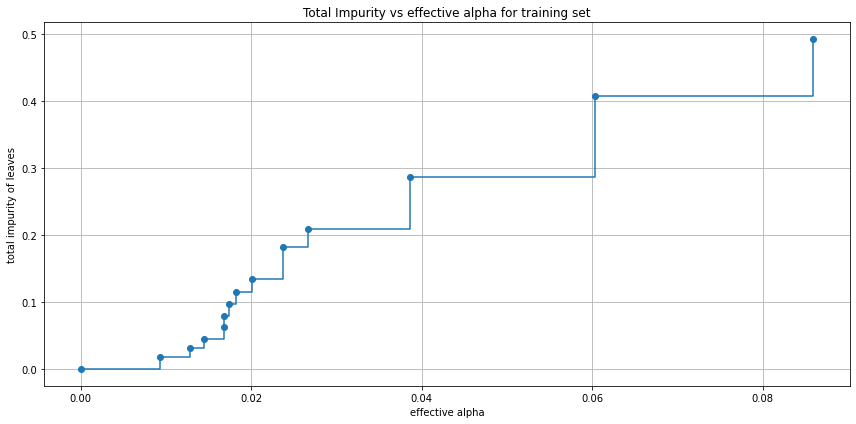

In [46]:
## Display performace
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.tight_layout()
plt.grid()
plt.show()

## Note: the maximum effective alpha value belong to the tree with only one node.

In [47]:
## Models allocation
models = []

## For each cp-value fit a model
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(models[-1].tree_.node_count, 
                                                                          ccp_alphas[-1]
                                                                         ))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08592265881347766


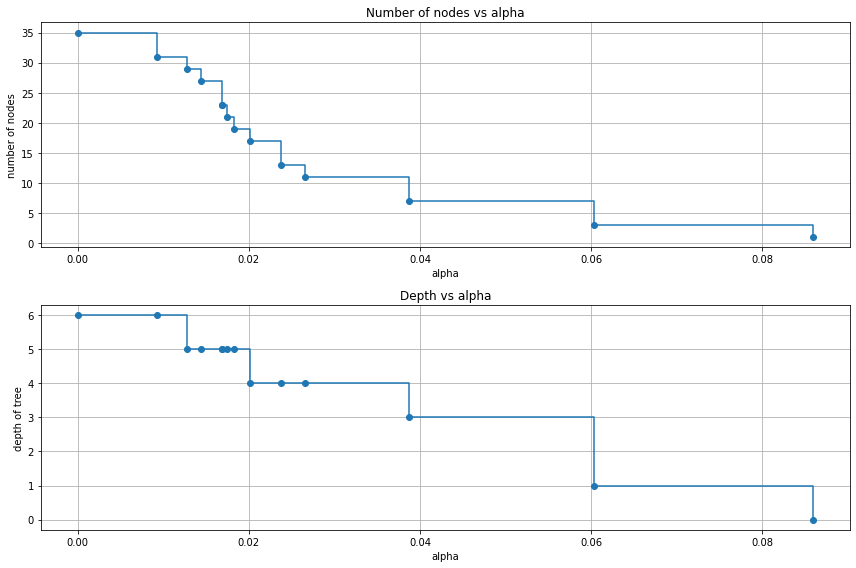

In [48]:
## Display: number of nodes vs cp-alpha, depth-tree vs cp-alpha

node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("number of nodes")
plt.title("Number of nodes vs alpha")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("depth of tree")
plt.title("Depth vs alpha")
plt.tight_layout()
plt.grid()
plt.show()

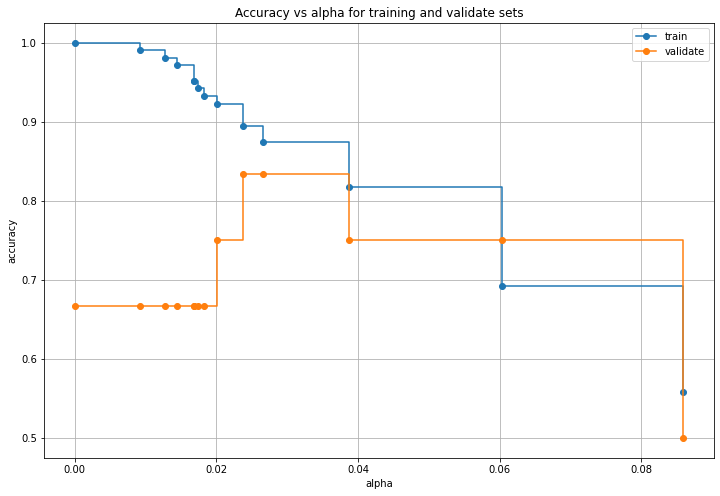

In [49]:
## Compute train set scores and validate set scores
train_scores = [model.score(X_train, y_train) for model in models]
val_scores = [model.score(X_val, y_val) for model in models]

## Performance display
plt.figure(figsize=(12, 8))
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and validate sets")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, val_scores, marker="o", label="validate", drawstyle="steps-post")
plt.legend()
plt.grid()
plt.show()

In [50]:
## Find best cp-value
best_cp_value = argmax(val_scores)
best_cp_value = ccp_alphas[best_cp_value]

print('Best cp-value: {}'.format(best_cp_value))

Best cp-value: 0.02372216599190284


### Fit best model

gini (Train): 0.8942
gini (Test): 0.5833


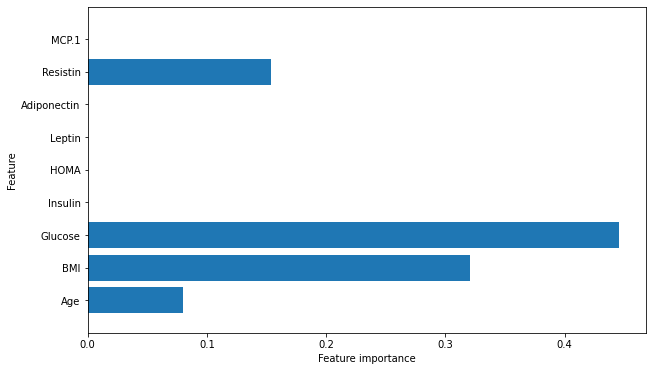

In [51]:
## model instance
model = DecisionTreeClassifier(random_state=0, ccp_alpha=best_cp_value)

## Fit model
model.fit(X_train, y_train)

## Compute score using train set
print('{} (Train): {:.4f}'.format(model.criterion, model.score(X=X_train, y=y_train)))

## Compute score using test set
print('{} (Test): {:.4f}'.format(model.criterion, model.score(X=X_test, y=y_test)))

## feature importances display
plot_feature_importances(model, feature_names)

In [52]:
model.tree_.node_count

13

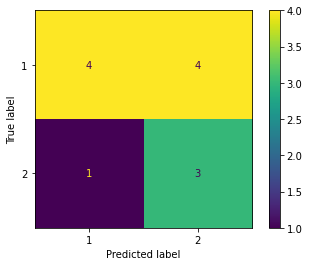

In [53]:
## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test);

In [54]:
## compute prediction
prediction = model.predict(X_test)

## display classification report
print(classification_report(y_pred=prediction, y_true=y_test))

              precision    recall  f1-score   support

           1       0.80      0.50      0.62         8
           2       0.43      0.75      0.55         4

    accuracy                           0.58        12
   macro avg       0.61      0.62      0.58        12
weighted avg       0.68      0.58      0.59        12



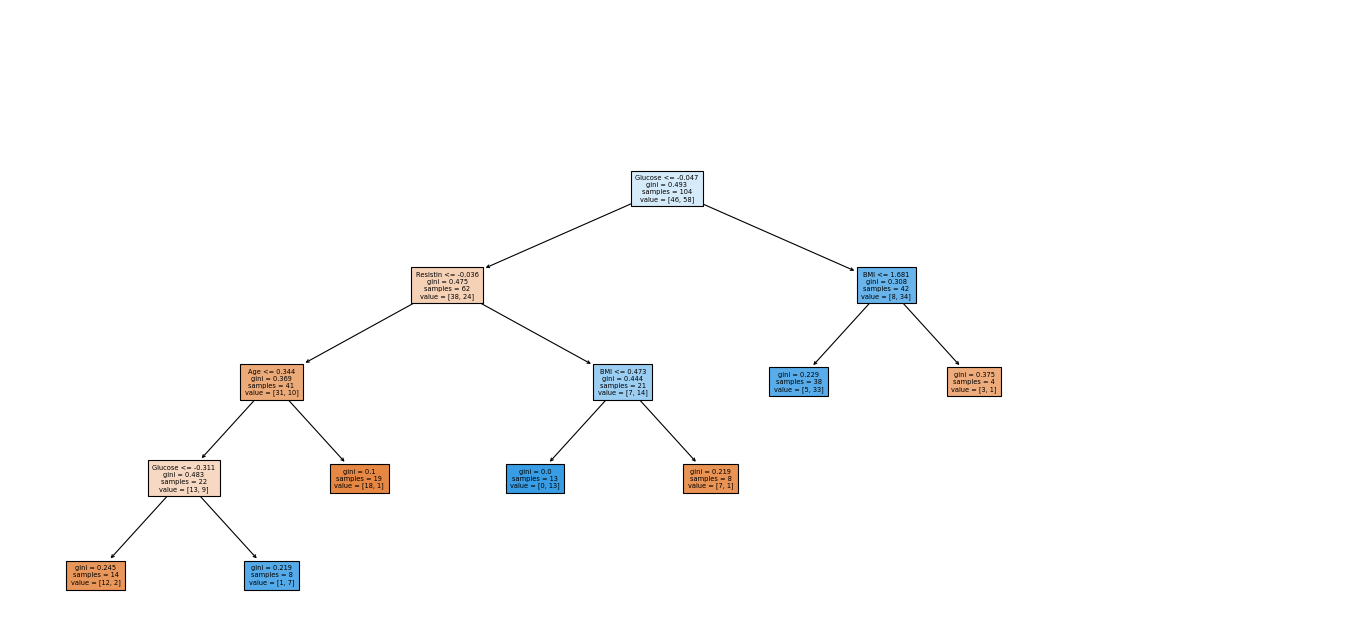

In [55]:
## Display tree

plt.figure(figsize=(17, 8), dpi=80)
plot_tree(decision_tree=model, 
          feature_names=data.columns[:-1],
          fontsize=6, filled=True);
plt.tight_layout()          
#plt.savefig('Regression_tree.pdf')